In [1]:
#Help marketer find insignhts for create marketing campaign

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
priceZone = pd.read_csv('dataset/price_zone.csv')

In [4]:
priceZone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
store                      999 non-null object
avg_weekly_sales           999 non-null int64
price_elasticity           999 non-null float64
median_household_income    999 non-null int64
avg_weekly_txn             999 non-null float64
avg_unit_retail            999 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 46.9+ KB


In [5]:
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
0,s1001,12293,-3.25,113848,585.380952,8.74
1,s1002,24606,-2.04,67687,984.240000,14.75
2,s1003,66042,-3.68,110448,7338.000000,11.55
3,s1004,64912,-2.48,39508,2704.666667,5.49
4,s1005,152239,-1.39,73039,15223.900000,8.93


In [6]:
priceZone.describe()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,104166.528529,-2.623994,87370.028028,8365.742307,8.921802
std,55788.861500,0.799776,35578.135917,6702.604205,3.520830
min,10290.000000,-4.000000,25110.000000,414.720000,3.000000
25%,54387.500000,-3.300000,56908.500000,3668.365080,5.710000
50%,104843.000000,-2.620000,85138.000000,6782.380952,8.990000
75%,152671.500000,-1.960000,117500.000000,10651.753470,11.985000
max,199970.000000,-1.210000,149965.000000,39291.200000,14.990000


# # Scale the data

In [7]:
stores = priceZone['store']
priceZone_scaled = priceZone.drop(columns=['store'])
priceZone_scaled = (priceZone_scaled - priceZone_scaled.mean()) / priceZone_scaled.std()
priceZone_scaled['store'] = stores
priceZone_scaled.head() 

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,store
0,-1.646808,-0.782727,0.744220,-1.160797,-0.051636,s1001
1,-1.426101,0.730197,-0.553234,-1.101289,1.655348,s1002
2,-0.683372,-1.320377,0.648656,-0.153335,0.746471,s1003
3,-0.703627,0.180043,-1.345265,-0.844608,-0.974714,s1004
4,0.861686,1.542925,-0.402804,1.023208,0.002328,s1005


In [8]:
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
0,s1001,12293,-3.25,113848,585.380952,8.74
1,s1002,24606,-2.04,67687,984.240000,14.75
2,s1003,66042,-3.68,110448,7338.000000,11.55
3,s1004,64912,-2.48,39508,2704.666667,5.49
4,s1005,152239,-1.39,73039,15223.900000,8.93


In [9]:
from sklearn.cluster import KMeans

#select K
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(priceZone_scaled.drop(columns=['store']))
    sse[k] = kmeans.inertia_ 

In [10]:
print(sse)

{1: 4989.999999999996, 2: 3845.6748755086874, 3: 3376.9978725488827, 4: 3017.4840059904964, 5: 2683.6895673023632, 6: 2426.9960057262792, 7: 2228.8008979231563, 8: 2048.896506453926, 9: 1891.9776157146393, 10: 1799.86300896068, 11: 1711.662592736692, 12: 1617.963303301699, 13: 1538.8967419412168, 14: 1482.4277501371014, 15: 1422.6812091704041, 16: 1369.748893309191, 17: 1319.6368180483396, 18: 1273.5128347508985, 19: 1246.7667982185933, 20: 1216.5730955768513}


Text(0,0.5,'SSE')

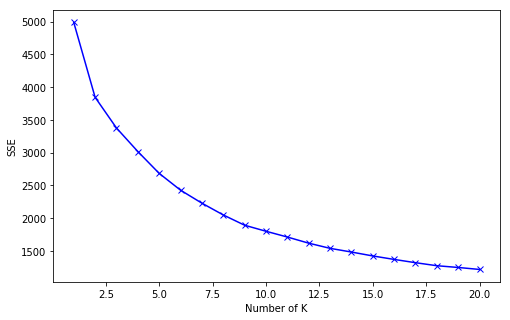

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of K")
plt.ylabel("SSE")

In [12]:
kmeans = KMeans(n_clusters=12, max_iter=2000).fit(priceZone_scaled.drop(columns=['store']))
priceZone_scaled['clusters'] = kmeans.labels_
priceZone_scaled.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,1.192702,0.422861,0.073721,2.975960,-0.517663
1,-0.718159,-0.897251,0.926531,-0.481436,0.892394
2,-0.525680,0.859654,-0.996680,-0.479098,-0.921511
3,0.674386,0.850498,-0.950401,0.488267,0.525374
4,0.794258,-0.809789,1.072361,0.312955,-0.505413
5,1.032159,0.513107,0.980153,0.466976,0.908571
6,0.552772,-0.787811,-0.784282,0.115392,-0.967067
7,-0.952879,-0.705354,-0.955619,-0.700246,0.667451
8,0.251575,1.091593,0.725846,0.012296,-0.959007


In [13]:
priceZone = pd.merge(priceZone, priceZone_scaled[['store', 'clusters']], on=['store'])

In [14]:
priceZone.groupby(by = ['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,170706.000000,-2.285800,89992.880000,28312.421722,7.099200
1,64101.275362,-3.341594,120334.289855,5138.868869,12.063768
2,74839.463415,-1.936463,51910.024390,5154.536730,5.677317
3,141789.776699,-1.943786,53556.514563,11638.401191,10.771553
4,148477.273973,-3.271644,125522.643836,10463.358884,7.142329
5,161749.521739,-2.213623,122242.057971,11495.695564,12.120725
6,135005.065934,-3.254066,59466.736264,9139.171246,5.516923
7,51006.504950,-3.188119,53370.871287,3672.267485,11.271782
8,118201.590361,-1.750964,113194.289157,8448.154682,5.545301
